<a href="https://colab.research.google.com/github/MhammadRezaValiYari/Statistical-Analaysis/blob/main/music_data_statistical_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

drive.mount('/content/drive', force_remount=True)
!ls '/content/drive/MyDrive/musicdata.csv'
data = pd.read_csv('/content/drive/MyDrive/musicdata.csv')
df = pd.DataFrame(data)
df.head(4)

Mounted at /content/drive
/content/drive/MyDrive/musicdata.csv


,Unnamed: 0,Track Name,Artists,Album Name,Album ID,Track ID,Popularity,Release Date,Duration (ms),Explicit,...,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo
0,0,Bijlee Bijlee,Harrdy Sandhu,Bijlee Bijlee,3tG0IGB24sRhGFLs5F1Km8,1iZLpuGMr4tn1F5bZu32Kb,70,2021-10-30,168450,False,...,0.670,1,-5.313,0,0.1430,0.2690,0.000000,0.0733,0.643,100.004
1,1,Expert Jatt,Nawab,Expert Jatt,2gibg5SCTep0wsIMefGzkd,7rr6n1NFIcQXCsi43P0YNl,65,2018-01-18,199535,False,...,0.948,6,-2.816,0,0.1990,0.2980,0.000000,0.0784,0.647,172.038
2,2,"Kaun Nachdi (From ""Sonu Ke Titu Ki Sweety"")","Guru Randhawa, Neeti Mohan",High Rated Gabru - Guru Randhawa,6EDbwGsQNQRLf73c7QwZ2f,3s7m0jmCXGcM8tmlvjCvAa,64,2019-03-02,183373,False,...,0.830,4,-3.981,0,0.0455,0.0357,0.000000,0.0419,0.753,127.999
3,3,Na Na Na Na,J Star,Na Na Na Na,4xBqgoiRSOMU1VlKuntVQW,5GjxbFTZAMhrVfVrNrrwrG,52,2015,209730,False,...,0.863,3,-3.760,1,0.0413,0.3760,0.000014,0.0916,0.807,95.000


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        100 non-null    int64  
 1   Track Name        94 non-null     object 
 2   Artists           94 non-null     object 
 3   Album Name        94 non-null     object 
 4   Album ID          100 non-null    object 
 5   Track ID          100 non-null    object 
 6   Popularity        100 non-null    int64  
 7   Release Date      100 non-null    object 
 8   Duration (ms)     100 non-null    int64  
 9   Explicit          100 non-null    bool   
 10  External URLs     100 non-null    object 
 11  Danceability      100 non-null    float64
 12  Energy            100 non-null    float64
 13  Key               100 non-null    int64  
 14  Loudness          100 non-null    float64
 15  Mode              100 non-null    int64  
 16  Speechiness       100 non-null    float64
 17

In [3]:
print(df.describe())

       Unnamed: 0  Popularity  Duration (ms)  Danceability     Energy  \
count  100.000000  100.000000     100.000000    100.000000  100.00000   
mean    49.500000   50.950000  210543.180000      0.767210    0.79763   
std     29.011492   16.496326   37961.050214      0.085302    0.11572   
min      0.000000    0.000000  141862.000000      0.501000    0.47700   
25%     24.750000   46.000000  186098.500000      0.714750    0.71125   
50%     49.500000   56.500000  205076.000000      0.772000    0.81700   
75%     74.250000   62.000000  226079.000000      0.826500    0.88125   
max     99.000000   72.000000  367818.000000      0.959000    0.98800   

             Key    Loudness       Mode  Speechiness  Acousticness  \
count  100.00000  100.000000  100.00000   100.000000    100.000000   
mean     4.54000   -4.399930    0.43000     0.115615      0.165559   
std      3.64434    1.612703    0.49757     0.075819      0.152536   
min      0.00000   -8.272000    0.00000     0.029400      0.00

In [4]:
df.isnull().sum()

,0
Unnamed: 0,0
Track Name,6
Artists,6
Album Name,6
Album ID,0
Track ID,0
Popularity,0
Release Date,0
Duration (ms),0
Explicit,0


In [5]:
music_data_cleand = df.drop(columns=['Unnamed: 0'])
columns_with_missing_value = ['Track Name', 'Artists', 'Album Name']
music_data_cleand[columns_with_missing_value] = music_data_cleand[columns_with_missing_value].fillna('Unknown')

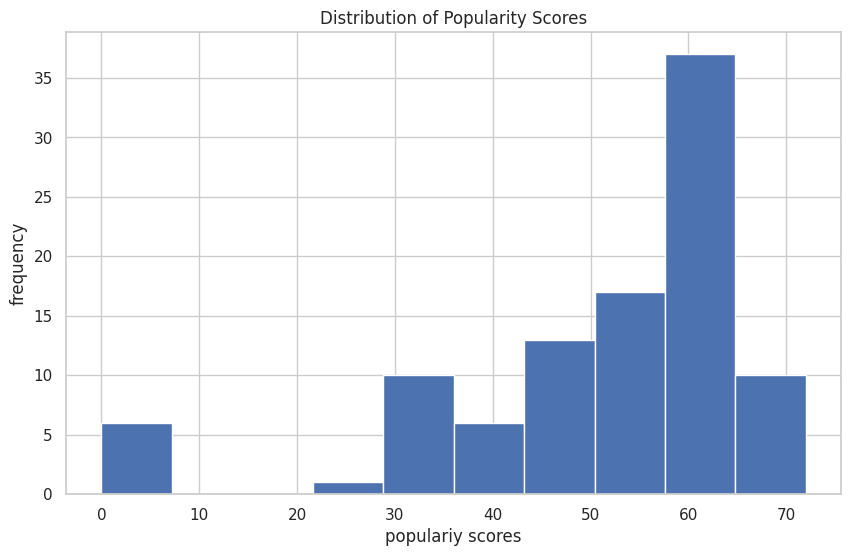

In [6]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.hist(music_data_cleand['Popularity'])
plt.title('Distribution of Popularity Scores')
plt.xlabel('populariy scores')
plt.ylabel('frequency')
plt.show()

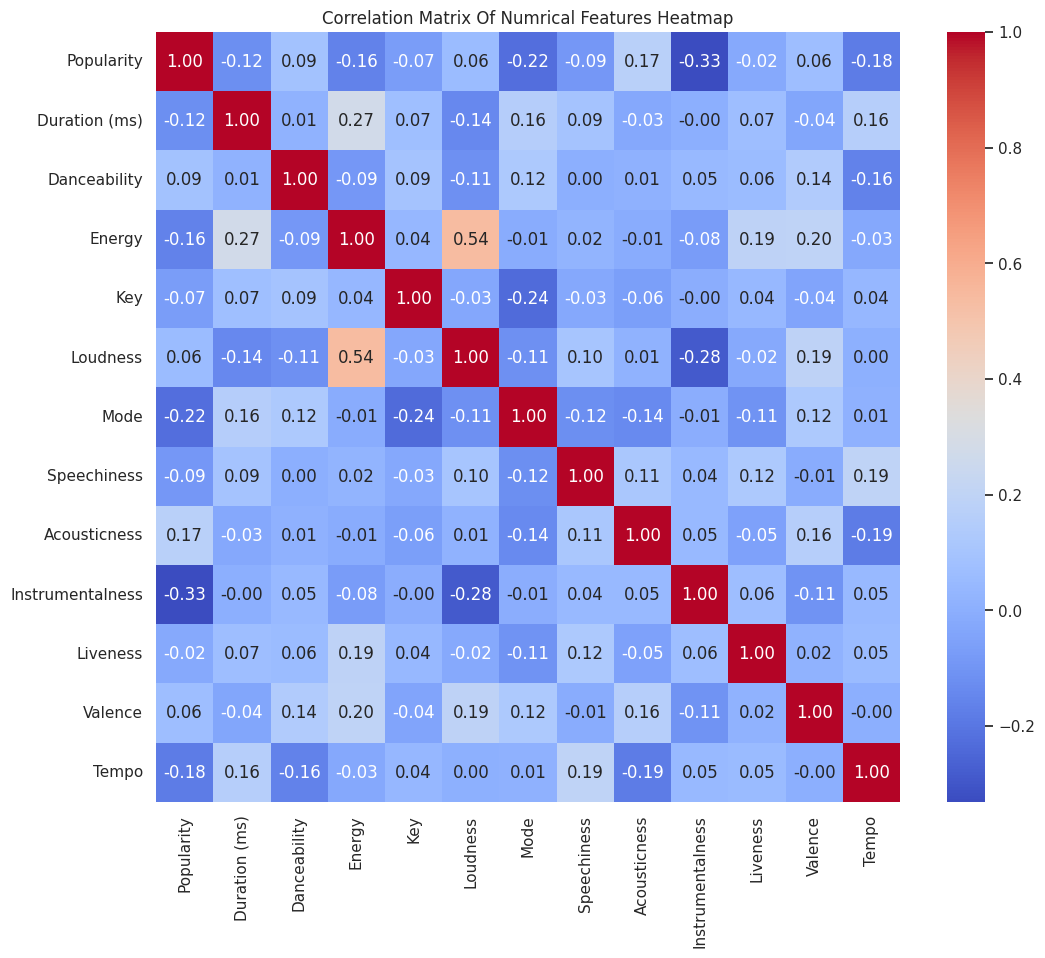

In [7]:
plt.figure(figsize=(12, 10))
correlation_matrix = music_data_cleand.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Of Numrical Features Heatmap')
plt.show()

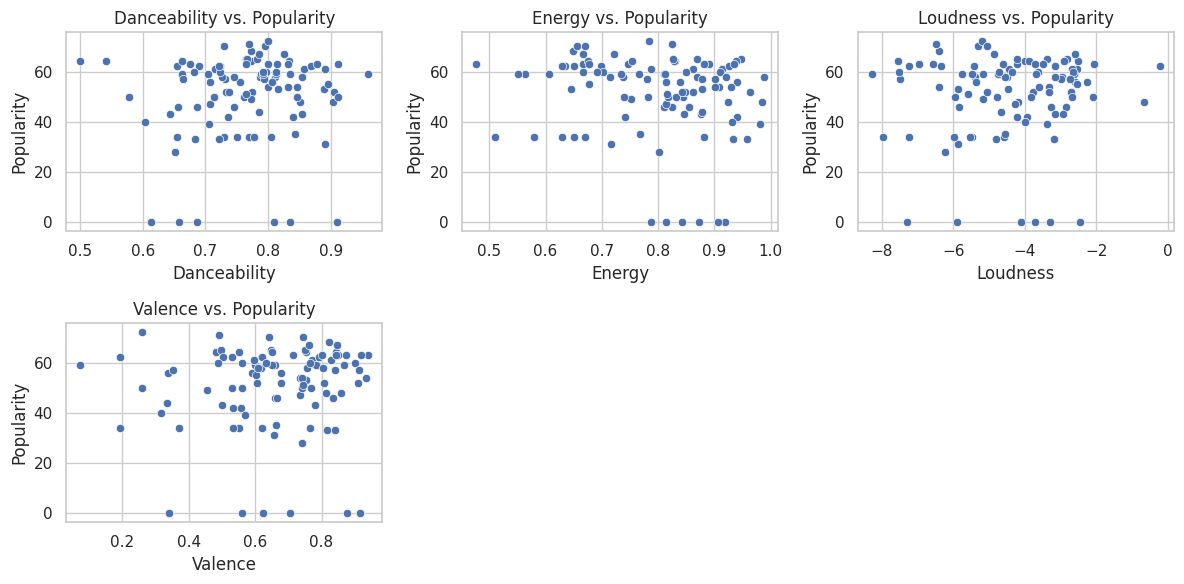

In [8]:
features = ['Danceability', 'Energy', 'Loudness', 'Valence']

y = music_data_cleand['Popularity']
plt.figure(figsize=(12, 6))
for i, feature in enumerate(features, 1):
  plt.subplot(2,3,i)
  sns.scatterplot(x=music_data_cleand[feature], y=y)
  plt.title(f"{feature} vs. Popularity")
  plt.xlabel(feature)
  plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

##quantitatively assess

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [10]:
music_data_cleand['Explicit'] = music_data_cleand['Explicit'].astype('int')

In [11]:
features = ['Acousticness', 'Danceability', 'Energy', 'Loudness', 'Valence']
X = music_data_cleand[features]
y = music_data_cleand['Popularity']

In [12]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [20]:
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print('-------------------------------------')
print(f"r2 score: {r2_score(y_test, y_pred)}")

mean squared error: 150.14102997523682
-------------------------------------
r2 score: -0.07362458418418094


In [18]:
coefficent = pd.Series(model.coef_, index=features)
coefficent

,0
Acousticness,3.794100
Danceability,0.550798
Energy,-3.901653
Loudness,2.364507
Valence,1.541523
